In [254]:
import requests
import unittest
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re

## Popularity functions

In [245]:
def _handle_request_result_and_build_soup(request_result):
    if request_result.status_code == 200:
        html_doc =  request_result.text
        soup = BeautifulSoup(html_doc,"html.parser")
        return soup

def _convert_string_to_int(string):
    if "K" in string:
        string = string.strip()[:-1]
        return float(string.replace(',','.'))*1000
    else:
        return int(string.strip())

def get_all_links_for_query(query):
    url = website_prefix + "/rechercher/"
    res = requests.post(url, data = {'q': query })
    soup = _handle_request_result_and_build_soup(res)
    specific_class = "c-article-flux__title"
    all_links = map(lambda x : x.attrs['href'] , soup.find_all("a", class_= specific_class))

    return all_links

def get_share_count_for_page(page_url):
    res = requests.get(page_url)
    soup = _handle_request_result_and_build_soup(res)
    specific_class = "c-sharebox__stats-number"
    share_count_text = soup.find("span", class_= specific_class).text
    return  _convert_string_to_int(share_count_text)


def get_popularity_for_people(query):  
    url_people = get_all_links_for_query(query)
    results_people = []
    
    for url in url_people:
        results_people.append(get_share_count_for_page(website_prefix + url))
    
    return sum(results_people)

def get_name_nationality(page_url):
    res = requests.get(page_url)
    soup = _handle_request_result_and_build_soup(res)
    specific_class = "btn btn-primary btn-sm btn-block btn-block-margin"
    share_count_text = soup.find("a", class_= specific_class).text
    return  share_count_text

## Get famous artists

In [134]:
artists_dict = {}

for i in range(1, 17):
    website = 'https://www.thefamouspeople.com/singers.php?page='+str(i)
    
    res = requests.get(website)
    specific_class = "btn btn-primary btn-sm btn-block btn-block-margin"
    soup = _handle_request_result_and_build_soup(res)
    classes = soup.find_all("a", class_= specific_class)
    
    for i in classes:
        mini_array = i.text[:-1].split('(')
        artists_dict[mini_array[0]]=mini_array[1]
    
artists_df = pd.DataFrame.from_dict(artists_dict, orient='index', columns=['Country'])
artists_df.head(n=10)

,Country
Louis Tomlinson,British
Aretha Franklin,American
Mac Miller,American
Freddie Mercury,British
Ariana Grande,American
Eminem,American
Lady Gaga,American
Nick Jonas,American
6ix9ine,American
Post Malone,American


## Add popularity to artists dataframes

In [147]:
for artist in artists_df.index:
    popularity = get_popularity_for_people(artist)
    print(artist, popularity)
    artists_df.loc[artist, 'Pop'] = popularity

Louis Tomlinson 97
Aretha Franklin 389
Mac Miller 490
Freddie Mercury 1664
Ariana Grande 440
Eminem 4671.0
Lady Gaga 112
Nick Jonas 1970.0
6ix9ine 45
Post Malone 482
XXXTentacion 1004
Michael Jackson 568
Nicki Minaj 108
Kanye West 540
Lacey Chabert 61
Travis Scott 83
Lil Wayne 7346.0
Justin Bieber 46
Jennifer Lopez 81
Elvis Presley 5538.0
Demi Lovato 195
Tupac Shakur 4756.0
Taylor Swift 42
Selena Gomez 69
Bobby Brown 462
Paul McCartney 376
Dua Lipa 358
John Cena 3633.0
Mark Wahlberg 530
Donald Glover 142
Brie Larson 73
Whitney Houston 144
Lil Pump 3
Shawn Mendes 270
Kristen Bell 30
Lil Xan 8
Rihanna 111
Ed Sheeran 1126.0
Danielle Bregoli 1
John Lennon 1198
Avril Lavigne 4824.0
Camila Cabello 76
David Bowie 447
Britney Spears 324
Johnny Cash 6945.0
Tina Turner 1919.0
Snoop Dogg 501
Billie Eilish 0
Judy Garland 122
Frank Sinatra 395
Mariah Carey 155
Zac Efron 130
Evan Ross 73
Miley Cyrus 123
Elton John 534
Diana Ross 71
50 Cent 155
Bob Marley 356
Andrea Bocelli 1720.0
Abbie Cornish 89
Va

Randy Travis 10
Tech N9ne 1271
Emmylou Harris 0
Lee Seung-gi 0
Park Chanyeol 0
Jackson Wang 300
Jay Park 3879.0
Hopsin 0
Rich the Kid 0
Gordon Lightfoot 0
Daveed Diggs 0
Dave Matthews 36
Faith Hill 3079.0
Alex Turner 1311.0
Playboi Carti 29
Mohammed Rafi 0
Soulja Boy 4
Natalie Cole 295
Richard Marx 9894.0
MC Hammer 1362.0
Pat Benatar 0
Skepta 107
Papoose 27
Keke Palmer 960
Tory Lanez 8
Luis Fonsi 53
Joe Strummer 0
Tyrese Gibson 1053.0
Chou Tzu-yu 0
Rich Brian 0
Safaree Samuels 1160.0
Celia Cruz 0
Trisha Yearwood 52
Jordan Fisher 9
Sasha Pieterse 5159.0
Joel Madden 20
James Blunt 174
Michael Bolton 3649.0
Jordin Sparks 446
Aaron Carter 64
Rick Springfield 31
Peter Frampton 5
Townes Van Zandt 0
Bob Geldof 90
Erika Christensen 28
Israel Houghton 1
Keyshia Cole 91
Redfoo 91
Tamar Braxton 111
Michael Stipe 99
Jessica Jung 113
Justina Valentine 0
Sarah Brightman 0
Yang Mi 5
Julia Michaels 32
Bret Michaels 40
Stormzy 3098.0
Kina Grannis 0
Heidi Montag 47
Cher Lloyd 2623.0
Fela Kuti 0
Timbalan

Fleur East 1020
Nathan Sykes 39
Rucka Rucka Ali 0
Jiro Wang 0
Marcus Schenkenberg 14
Juice WRLD 0
Mehdi Hassan 124
Steve Augeri 0
George M. Cohan 0
Nia Kay 0
Belén Rodríguez 9
Evan Felker 4
Carlos Gardel 7
Matt Terry 145
Choi Min-soo 0
Karlie Redd 0
Kirshnik Ball 0
Mandela Van Peebles 0
Rocky Lynch 22
Kinky Friedman 0
Nellie Melba 0
Paulina Goto 0
Jazzy B 730
Shaheen Jafargholi 0
Matthew Healy 5
Kurt Hugo Schneider 0
Alan Lomax 0
Lil Twist 0
Sage the Gemini 42
Bow Wow 9100.0
Chantal Kreviazuk 0
James Bay 65
Momma Dee 0
Max George 383
DcYoungFly 0
Kap G 0
Adam Rickitt 0
Perrie Edwards 5315.0
K Michelle 92
Gerardo Ortiz 0
Jade Thirlwall 14
Mark Tuan 0
Park Cho-rong 0
Tammy Townsend 0
Montana of 300 18827.0
Tony Oller 8
Alex Aiono 0
Ruby Da Cherry 0
Slim Dusty 0
Juliet Simms 16
Rye Beaumont 0
Harris J 472
Charice Pempengco 1230.0
Adam Young 517
Jacob Perez 48
NBA 3Three 54
Bailey May 0
Sham Idrees 0
Begum Akhtar 0
Hazel E 19
Juan Karlos Labajo 0
Patrick Bruel 343
Quavo Marshall 0
Yolandi 

In [169]:
artists_df.head(n=5)

,Country,Pop
Louis Tomlinson,British,97.0
Aretha Franklin,American,389.0
Mac Miller,American,490.0
Freddie Mercury,British,1664.0
Ariana Grande,American,440.0


## Plot country origin trend

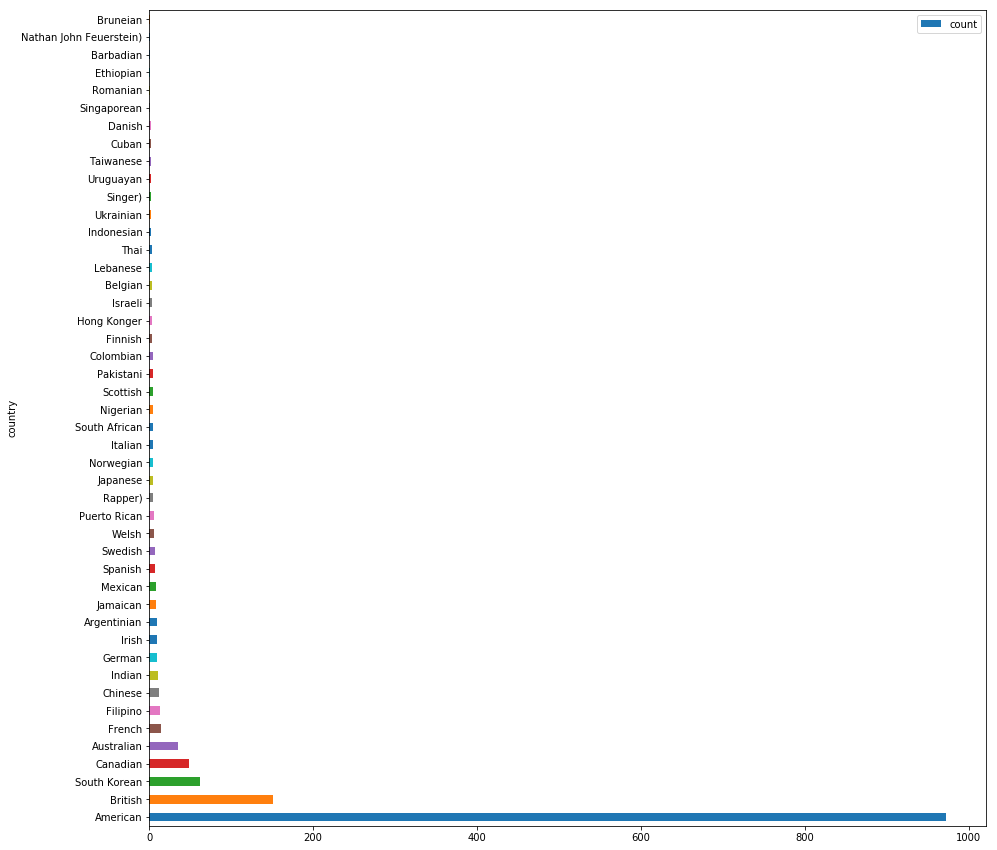

In [130]:
artists_df['Country'] = artists_df['Country'].apply(lambda x: x.split(',')[0])
final_df = artists_df['Country'].value_counts().to_frame()

dict_artist = {'country': ['American', 'British', 'South Korean', 'Canadian', 'Australian', 'French', 'Filipino', 'Chinese', 'Indian', 'German', 'Irish', 'Argentinian', 'Jamaican', 'Mexican', 'Spanish', 'Swedish', 'Welsh', 'Puerto Rican', 'Rapper)', 'Japanese', 'Norwegian', 'Italian', 'South African', 'Nigerian', 'Scottish', 'Pakistani', 'Colombian', 'Finnish', 'Hong Konger', 'Israeli', 'Belgian', 'Lebanese', 'Thai', 'Indonesian', 'Ukrainian', 'Singer)', 'Uruguayan', 'Taiwanese', 'Cuban', 'Danish', 'Singaporean', 'Romanian', 'Ethiopian', 'Barbadian', 'Nathan John Feuerstein)', 'Bruneian'], 
      'count': [973, 151, 62, 49, 35, 14, 13, 12, 11, 9, 9, 9, 8, 8, 7, 7, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]}
df = pd.DataFrame(data=dict_artist)



hist = df.plot.barh(x='country', y='count', figsize=(15, 15))
hist.plot(figsize=(20, 20))
plt.show()

## Scraping SocialBlade for Channels influence

In [196]:
website = "https://socialblade.com/youtube/top/category/music/mostviewed"

res = requests.get(website)
soup = _handle_request_result_and_build_soup(res)

datas1 = soup.find_all('div', style="width: 860px; background: #fafafa; padding: 10px 20px; color:#444; font-size: 10pt; border-bottom: 1px solid #eee; line-height: 40px;")
datas2 = soup.find_all('div', style="width: 860px; background: #f8f8f8;; padding: 10px 20px; color:#444; font-size: 10pt; border-bottom: 1px solid #eee; line-height: 40px;")
datas3 = soup.find_all('div', style="width: 860px; background: #fafafa; padding: 0px 20px; color:#444; font-size: 10pt; border-bottom: 1px solid #eee; line-height: 30px;")
datas4 = soup.find_all('div', style="width: 860px; background: #f8f8f8;; padding: 0px 20px; color:#444; font-size: 10pt; border-bottom: 1px solid #eee; line-height: 30px;")


In [207]:
channels_metrics = {}

for data in datas1:  
    
    channel = data.find("div", style="float: left; width: 350px; line-height: 25px;")
    chan = channel.text.strip()
    
    folowers = data.find('div', style="float: left; width: 150px;")
    folowers = int(folowers.text.strip().replace(',', ''))
    
    channels_metrics[chan] = folowers
    
for data in datas2:
    
    channel = data.find('div', style='float: left; width: 350px; line-height: 25px;')
    chan = channel.text.strip()
    folowers = data.find('div', style="float: left; width: 150px;")
    folowers = int(folowers.text.strip().replace(',', ''))
    channels_metrics[chan] = folowers
    
for data in datas3:
    
    channel = data.find('div', style='float: left; width: 350px; line-height: 25px;')
    chan = channel.text.strip()
    folowers = data.find('div', style="float: left; width: 150px;")
    folowers = int(folowers.text.strip().replace(',', ''))
    channels_metrics[chan] = folowers

for data in datas4:
    
    channel = data.find('div', style='float: left; width: 350px; line-height: 25px;')
    chan = channel.text.strip()
    folowers = data.find('div', style="float: left; width: 150px;")
    
    try:
      folowers = int(folowers.text.strip().replace(',', ''))
    except ValueError as verr:
      folowers = 0
    
    channels_metrics[chan] = folowers

{'1theK (원더케이)': 14134162,
 '50CentVEVO': 4700778,
 'AdeleVEVO': 16187818,
 'Adexe & Nau': 8019359,
 'Aditya Music': 7121142,
 'AkonVEVO': 3717275,
 'Alan Walker': 19567391,
 'Anitta': 10477594,
 'ArianaGrandeVevo': 19063033,
 'Armada Music': 4116124,
 'Atlantic Records': 8769822,
 'AviciiOfficialVEVO': 11602023,
 'AvrilLavigneVEVO': 7227584,
 'Awakening Records': 6237913,
 'BIGBANG': 10446539,
 'Bad Bunny': 14349870,
 'BeckyGVEVO': 6657212,
 'BeyoncéVEVO': 13693170,
 'BlackEyedPeasVEVO': 4077901,
 'Bollywood Classics': 6937926,
 'BonJoviVEVO': 3018880,
 'Bounce Patrol Kids': 5030379,
 'Boyce Avenue': 12052871,
 'BritneySpearsVEVO': 5216354,
 'Bruno Mars': 23225328,
 'CAguileraVEVO': 2608900,
 'CNCOVEVO': 6194333,
 'CalibreCincuentaVEVO': 3092070,
 'CalvinHarrisVEVO': 12767377,
 'Canal KondZilla': 43406575,
 'CantaJuegoVEVO': 2732176,
 'CarlosVivesVEVO': 3293657,
 'Cat Music': 5228811,
 'ChainsmokersVEVO': 12392689,
 'Charlie Puth': 13590717,
 'ChinoNachoVEVO': 3404052,
 'ChrisBrownVEV

## Plotting suscribers repartition

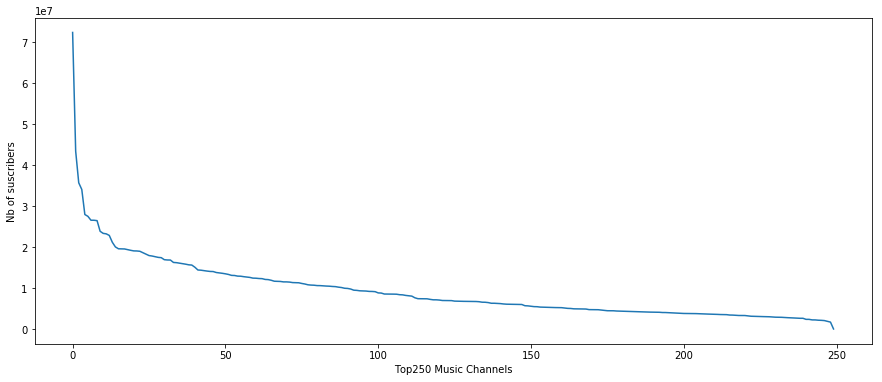

In [244]:
df_channels = pd.DataFrame(list(channels_metrics.items()), columns=['Channel', 'Followers'])

plt.figure(figsize=(15, 6))
fol_list = df_channels.sort_values('Followers', ascending=0)['Followers'].tolist()
plt.plot(fol_list)
plt.xlabel("Top250 Music Channels")
plt.ylabel("Nb of suscribers")
plt.show()

In [273]:
countries = ['us', 'de', 'nl', 'in', 'au', 'gb', 'fr', 'cn', 'br', 'ru', 'it', 'es', 'ca', 'ar', 'pt', 'jp', 'lt', 'lu']
music_rate = {}

website_base = "https://socialblade.com/youtube/top/country/"

for country in countries:
    website = website_base + country
    res = requests.get(website)
    soup = _handle_request_result_and_build_soup(res)
    
    datas5 = soup.find_all('i', style="color:#aaa; padding-left: 5px;")
    
    genres = []
    for data in datas5:
        genres.append(data.get("title"))
    
    cnt = genres.count("Category: music")
    music_rate[country] = cnt * 100 / 250

music_rate

{'ar': 28.0,
 'au': 14.8,
 'br': 22.4,
 'ca': 10.4,
 'cn': 4.4,
 'de': 16.8,
 'es': 14.4,
 'fr': 25.6,
 'gb': 20.0,
 'in': 21.6,
 'it': 19.6,
 'jp': 9.6,
 'lt': 34.8,
 'lu': 20.0,
 'nl': 26.4,
 'pt': 24.0,
 'ru': 8.4,
 'us': 27.6}

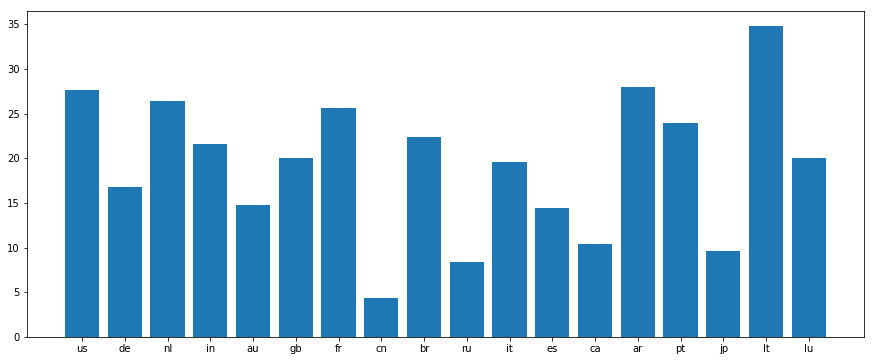

In [274]:
plt.figure(figsize=(15, 6))
plt.bar(range(len(music_rate)), list(music_rate.values()), align='center')
plt.xticks(range(len(music_rate)), list(music_rate.keys()))

plt.show()